In [1]:
1+2

3

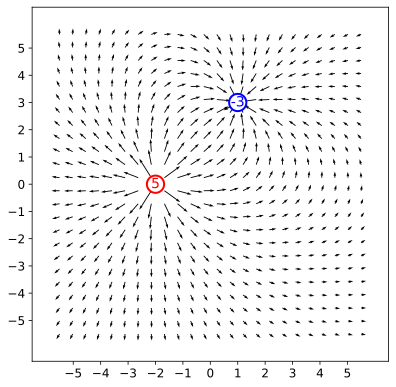

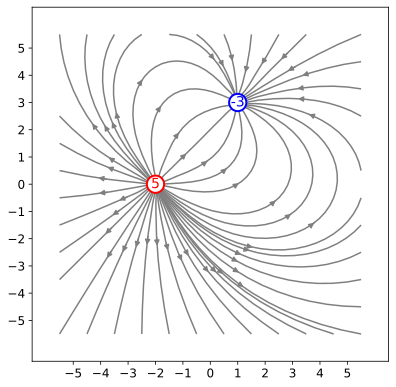

In [25]:
# https://home.hirosaki-u.ac.jp/relativity/6003/

import numpy as np
import matplotlib.pyplot as plt

# グラフを SVG で Notebook にインライン表示させる設定
%config InlineBackend.figure_formats = ['svg']
# フォント設定
#plt.rcParams['font.family'] = 'Noto Sans CJK JP'
plt.rcParams['font.size'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

###############################
# 2つの電荷が作る電場ベクトルの定義
###############################
# 電荷 q1,q2 とその位置 (グローバル変数)
q1 = 5
q2 = -3
x1 = -2
y1 = 0
x2 = 1
y2 = 3

# 1個の点電荷がつくる電場 (規格化済)
def Ex(x, y):
    return x/np.sqrt(x**2 + y**2)**3
def Ey(x, y):
    return y/np.sqrt(x**2 + y**2)**3

# 2個の点電荷がつくる電場　（電荷倍し、各位置を反映）
def E2x(x, y):
    return q1 * Ex(x-x1, y-y1) + q2 * Ex(x-x2, y-y2)
def E2y(x, y):
    return q1 * Ey(x-x1, y-y1) + q2 * Ey(x-x2, y-y2)

# 正負の2個の点電荷がつくる電場の大きさ(規格化用)
def E(x, y):
    return np.sqrt(E2x(x, y)**2 + E2y(x, y)**2)

# 規格化された電場ベクトル **0.8は、正しくは **1だが、遠方で弱くなる電場をmimicするため0.8に調整
def hE2x(x, y):
    return E2x(x, y)/E(x, y)**0.8
def hE2y(x, y):
    return E2y(x, y)/E(x, y)**0.8
#####################################################
#####################################
# ベクトル場作りのメッシュ, y軸上をさける
# x, yがベクトルの始点となる
#####################################
x = y = np.linspace(-5.5, 5.5, 24)
x, y = np.meshgrid(x, y)

####################
# Figs のフォーマット
####################
#########
# Fig. 1
#########
fig1 = plt.figure(figsize=(6.4, 6.4))
ax1  = fig1.add_subplot(111)
# 表示範囲
ax1.set_xlim(-6.5, 6.5)
ax1.set_ylim(-6.5, 6.5)
# グリッドの表示
#plt.grid()
# x,y の主目盛を 1 刻みに
ax1.set_xticks(np.arange(-5, 6, 1))
ax1.set_yticks(np.arange(-5, 6, 1))
##########
# Fig. 2
##########
fig2 = plt.figure(figsize=(6.4, 6.4))
ax2 = fig2.add_subplot()
# 枠と縦軸目盛を非表示に
#ax2.set_axis('off')
# 表示範囲
ax2.set_xlim(-6.5, 6.5)
ax2.set_ylim(-6.5, 6.5)
# x,y の主目盛を 1 刻みに
ax2.set_xticks(np.arange(-5, 6, 1))
ax2.set_yticks(np.arange(-5, 6, 1))

#################################
# x, y を始点としたベクトル場の表示
##################################
ax1.quiver(x, y, hE2x(x, y), hE2y(x, y)) # 規格化した
#ax1.quiver(x, y, E2x(x, y), E2y(x, y)) #規格化していない
#ax2.quiver(x, y, hE2x(x, y), hE2y(x, y)) # 規格化した

## 各ベクトルの始点を赤点で
#plt.scatter(x, y, c='r', s=5)

color_q1 = "blue" if q1 < 0 else "red"
color_q2 = "blue" if q2 < 0 else "red"

# 電荷q1の位置
ax1.scatter(x1, y1, marker='o', 
            # size, color
            s = 300, c = 'white',
            edgecolors = color_q1, linewidths = 2)
ax1.text(x1, y1, f"{q1}", color = color_q1,
         horizontalalignment = "center", 
         verticalalignment = "center")

# 電荷のq2位置
ax1.scatter(x2, y2, marker='o', 
            # size, color
            s = 300, c = 'white',
            edgecolors = color_q2, linewidths = 2)
ax1.text(x2, y2, f"{q2}", color = color_q2,
         horizontalalignment = "center", 
         verticalalignment = "center")

fig1.savefig("single.pdf")        # save fig as pdf etc


ax2.streamplot(x, y, hE2x(x, y), hE2y(x, y),
               broken_streamlines = False, density=0.4,
                zorder = 0, color = 'tab:gray')

# 電荷q1の位置
ax2.scatter(x1, y1, marker='o', 
            # size, color
            s = 300, c = 'white',
            edgecolors = color_q1, linewidths = 2)
ax2.text(x1, y1, f"{q1}", color = color_q1,
         horizontalalignment = "center", 
         verticalalignment = "center")

# 電荷のq2位置
ax2.scatter(x2, y2, marker='o', 
            # size, color
            s = 300, c = 'white',
            edgecolors = color_q2, linewidths = 2)
ax2.text(x2, y2, f"{q2}", color = color_q2,
         horizontalalignment = "center", 
         verticalalignment = "center")

fig2.savefig("rikisen.pdf") 
